In [268]:
import pandas as pd
import numpy as np
from datetime import datetime


# 时间序列

种类：   
+ 时间戳(timestamp)：特定的时刻
+ 固定时期(period)：如，2007年1月或2019整年
+ 时间间隔(interval)：由起始时间和结束时间戳表示。时期(period)可以看成是时间间隔的一个特例
+ 实验或过程时间：每个时间点都是相对于特定起始时间的一个度量。例如，从放入烤箱时起，每秒钟饼干的直径。



## 日期和时间数据类型及工具

Python标准库包含用于日期（date）和时间（time）数据的数据类型，而且还有日历方面的功能。我们主要会用到datetime、time以及calendar模块。datetime.datetime（也可以简写为datetime）是用得最多的数据类型：

datetime以毫秒的形式储存日期和时间

In [1]:

now = datetime.now()
now

datetime.datetime(2019, 11, 12, 17, 4, 26, 818636)

In [3]:
display(now.year,now.month,  now.day)

2019

11

12

timedelta表示两个datetime对象之间的**时间差**

In [8]:
delta = datetime(2019, 10,1) - datetime(2019, 9, 2, 17)
delta

datetime.timedelta(days=28, seconds=25200)

In [10]:
delta.days

28

In [11]:
delta.seconds

25200

给datetime对象加上(减去)一个或多个timedelta，这样可以产生一个新的datetime

In [13]:
from datetime import timedelta
start = datetime(2019,11,11)
start + timedelta(30)  # timedelta(day)

datetime.datetime(2019, 12, 11, 0, 0)

In [14]:
start - timedelta(11) * 2

datetime.datetime(2019, 10, 20, 0, 0)

datetime模块中的数据类型

![](https://camo.githubusercontent.com/9f86270387f8b04bc10b63b98538264a8f359a47/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d346166323631613330356137306165622e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)

### 字符串与datetime的相互转换

利用str或者strftime方法(传入一个格式化字符串)

In [22]:
from datetime import datetime
stamp = datetime(2011,1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [28]:
stamp.strftime('%Y-%m-%d-%H')

'2011-01-03-00'

格式化编码

![](https://camo.githubusercontent.com/e8437841d3c960a8c5ee7c2810243e981cd028e7/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d353063373531383233373534646635382e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)
![](https://camo.githubusercontent.com/2ad68b9bd8863a4e86d903f6dd5cd2f70478fe49/687474703a2f2f75706c6f61642d696d616765732e6a69616e7368752e696f2f75706c6f61645f696d616765732f373137383639312d646530313831653166366234356561662e706e673f696d6167654d6f6772322f6175746f2d6f7269656e742f7374726970253743696d61676556696577322f322f772f31323430)

`datetime.strptime(date_str, fmt)`可以把字符转换为日期

In [34]:
value = '2019-01-22 17:17'
datetime.strptime(value, '%Y-%m-%d %H:%M')

datetime.datetime(2019, 1, 22, 17, 17)

In [36]:
datestrs = ['7/6/2011', '8/7/2011']
[datetime.strptime(date, '%m/%d/%Y') for date in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 7, 0, 0)]

利用dateutil第三方包的parser.parse 方法自动格式化字符串

In [44]:
from dateutil.parser import parse
parse('2019-2-2')

datetime.datetime(2019, 2, 2, 0, 0)

In [47]:
parse('Jan 31, 2001 10:45 AM')

datetime.datetime(2001, 1, 31, 10, 45)

在国际通用的格式中，日出现在月的前面很普遍，传入dayfirst=True即可解决这个问题：

In [49]:
parse('6/12/2019', dayfirst=True)

datetime.datetime(2019, 12, 6, 0, 0)

Pandas处理时间

In [51]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

处理缺失值

In [52]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [53]:
idx[2]

NaT

In [54]:
pd.isnull(idx)

array([False, False,  True])

## 时间序列基础

pandas最基本的时间序列类型就是以时间戳(python字符串或者datetime对象)为索引的Series

In [3]:
from datetime import datetime 
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
             datetime(2011, 1, 7), datetime(2011, 1, 8),
             datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts


2011-01-02   -1.194158
2011-01-05   -0.306796
2011-01-07    1.116608
2011-01-08   -0.532238
2011-01-10    0.847707
2011-01-12   -0.646474
dtype: float64

datetime对象会被放在一个DatetimeIndex中

In [5]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

跟其他Series一样，不同索引的时间序列之间的算术运算会自动按日期对齐：

In [6]:
ts + ts[::2]

2011-01-02   -2.388315
2011-01-05         NaN
2011-01-07    2.233216
2011-01-08         NaN
2011-01-10    1.695415
2011-01-12         NaN
dtype: float64

pandas用NumPy的datetime64数据类型以纳秒形式存储时间戳：

In [7]:
ts.index.dtype

dtype('<M8[ns]')

In [8]:
stamps = ts.index[0]
stamps

Timestamp('2011-01-02 00:00:00')

### 索引、选取、子集构造

索引

In [9]:
stamp = ts.index[2]
ts[stamp]

1.116607869433447

#### 传入一个可以被解释为日期的字符串当作索引

In [14]:
ts['2011-01-10']

0.8477074316704791

In [15]:
ts['2011/01/12']

-0.6464744566192113

#### 传入‘年’或‘年月’当作索引

In [17]:
longer_ts = pd.Series(np.random.randn(1000),
                          index=pd.date_range('1/1/2000', periods=1000))
longer_ts.head()

2000-01-01   -0.187375
2000-01-02   -0.067674
2000-01-03   -1.712888
2000-01-04   -0.747783
2000-01-05    0.333900
Freq: D, dtype: float64

In [19]:
longer_ts['2001']

2001-01-01   -1.606793
2001-01-02   -0.499444
2001-01-03   -0.324808
2001-01-04    0.505935
2001-01-05   -0.810908
2001-01-06    0.612167
2001-01-07    2.702594
2001-01-08    1.904215
2001-01-09    0.672189
2001-01-10    0.216981
2001-01-11   -0.535941
2001-01-12    0.999049
2001-01-13   -0.134516
2001-01-14    0.622957
2001-01-15   -0.238416
2001-01-16   -1.907065
2001-01-17   -0.296376
2001-01-18    1.153148
2001-01-19    0.621831
2001-01-20   -1.375368
2001-01-21   -2.163471
2001-01-22    0.793436
2001-01-23   -1.050369
2001-01-24   -0.950940
2001-01-25    0.061185
2001-01-26   -0.795957
2001-01-27    0.646450
2001-01-28   -0.793313
2001-01-29    0.860520
2001-01-30   -2.418400
                ...   
2001-12-02   -0.155318
2001-12-03    0.731316
2001-12-04   -1.725767
2001-12-05   -1.496930
2001-12-06    0.456820
2001-12-07    0.249163
2001-12-08   -0.167631
2001-12-09    0.490300
2001-12-10   -0.227964
2001-12-11   -0.429328
2001-12-12   -0.030137
2001-12-13   -0.687841
2001-12-14 

In [21]:
longer_ts['2001-02']

2001-02-01   -2.193425
2001-02-02   -0.410601
2001-02-03    0.117203
2001-02-04   -1.340485
2001-02-05    0.231272
2001-02-06   -2.310974
2001-02-07   -0.559276
2001-02-08    1.325032
2001-02-09   -1.118997
2001-02-10    0.216425
2001-02-11    0.124477
2001-02-12    1.357221
2001-02-13    2.349129
2001-02-14   -0.175117
2001-02-15    0.145642
2001-02-16    0.618549
2001-02-17   -1.243417
2001-02-18   -0.309689
2001-02-19    1.015671
2001-02-20   -0.555302
2001-02-21    1.288016
2001-02-22    0.133050
2001-02-23   -0.343456
2001-02-24    0.428486
2001-02-25    1.433945
2001-02-26    0.469853
2001-02-27    1.355848
2001-02-28    0.700952
Freq: D, dtype: float64

#### 传入datetime对象进行切片

In [39]:
longer_ts[datetime(2002,2,1):]

2002-02-01    2.061417
2002-02-02    0.848619
2002-02-03   -1.101725
2002-02-04   -0.483710
2002-02-05   -1.779068
2002-02-06    1.532477
2002-02-07   -1.625422
2002-02-08    0.779254
2002-02-09   -1.435185
2002-02-10    0.522743
2002-02-11   -0.074013
2002-02-12   -0.394254
2002-02-13   -0.596421
2002-02-14    0.231929
2002-02-15   -0.097626
2002-02-16   -0.508044
2002-02-17    0.180964
2002-02-18    0.007529
2002-02-19    1.376462
2002-02-20   -1.152540
2002-02-21    0.716215
2002-02-22    0.591595
2002-02-23   -0.814300
2002-02-24    0.836869
2002-02-25   -0.660725
2002-02-26    0.571871
2002-02-27    1.201652
2002-02-28   -0.747978
2002-03-01   -0.161894
2002-03-02   -0.264508
                ...   
2002-08-28    1.011228
2002-08-29   -1.574289
2002-08-30    1.717037
2002-08-31   -0.147131
2002-09-01    1.475451
2002-09-02   -0.031305
2002-09-03   -1.007247
2002-09-04    0.618203
2002-09-05    0.534853
2002-09-06   -0.130561
2002-09-07    0.786830
2002-09-08    0.734429
2002-09-09 

由于大部分时间序列数据都是按照时间先后排序的，因此你也可以用不存在于该时间序列中的时间戳对其进行切片（即范围查询）：

In [46]:
ts.tail()

2011-01-05   -0.306796
2011-01-07    1.116608
2011-01-08   -0.532238
2011-01-10    0.847707
2011-01-12   -0.646474
dtype: float64

In [48]:
ts['1/8/2011':'1/20/2011']

2011-01-08   -0.532238
2011-01-10    0.847707
2011-01-12   -0.646474
dtype: float64

In [50]:
ts.truncate(after='1/9/2011')

2011-01-02   -1.194158
2011-01-05   -0.306796
2011-01-07    1.116608
2011-01-08   -0.532238
dtype: float64

In [52]:
ts

2011-01-02   -1.194158
2011-01-05   -0.306796
2011-01-07    1.116608
2011-01-08   -0.532238
2011-01-10    0.847707
2011-01-12   -0.646474
dtype: float64

#### 对DataFrame进行时间索引

In [55]:
# 以周为频率，取周末
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')  
long_df = pd.DataFrame(np.random.randn(100, 4), index=dates,
                      columns=['Colorado', 'Texas',
                              'New York', 'Ohio'])

In [57]:
long_df.head()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.247645,0.016810,-0.174457,-0.521701
2000-01-12,-0.208436,1.986898,-0.249855,0.895513
2000-01-19,0.525579,-0.990939,-0.045783,-0.296696
2000-01-26,-0.406683,-0.310222,-0.349143,-1.221109
2000-02-02,0.384020,1.141768,0.751051,0.252720


In [60]:
long_df.loc['2000-2-5':'2000-3-5']

,Colorado,Texas,New York,Ohio
2000-02-09,-0.565475,0.562137,0.438858,0.992865
2000-02-16,-0.602714,-1.353655,2.055650,-0.673158
2000-02-23,0.753310,1.437116,-0.879119,-0.284904
2000-03-01,1.713750,-0.450277,0.109728,0.455007


### 带有重复索引的时间序列

In [63]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                              '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

#### 检测索引是否重复

In [65]:
dup_ts.index.is_unique

False

对时间序列进行索引，如果索引有重复值，则产生切片

In [69]:
dup_ts['1/3/2000']

4

In [71]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

#### 对非唯一的时间戳的数据进行聚合


In [73]:
dup_ts.groupby(level=0).mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [74]:
dup_ts.groupby(level=0).count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 日期的范围、频率以及偏移

pandas中的原生时间序列一般被认为是不规则的，也就是说，它们没有固定的频率。对于大部分应用程序而言，这是无所谓的。但是，它常常需要以某种相对固定的频率进行分析，比如每日、每月、每15分钟等（这样自然会在时间序列中引入缺失值）。幸运的是，pandas有一整套标准时间序列频率以及用于重采样、频率推断、生成固定频率日期范围的工具。例如，我们可以将之前那个时间序列转换为一个具有固定频率（每日）的时间序列，只需调用resample即可：

In [75]:
ts

2011-01-02   -1.194158
2011-01-05   -0.306796
2011-01-07    1.116608
2011-01-08   -0.532238
2011-01-10    0.847707
2011-01-12   -0.646474
dtype: float64

In [80]:
resample = ts.resample('D')

### 生成日期范围

#### pd.date_range() 
默认以天为单位

In [82]:
index = pd.date_range('2019-10-01', '2019-11-01')
index

DatetimeIndex(['2019-10-01', '2019-10-02', '2019-10-03', '2019-10-04',
               '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08',
               '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12',
               '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16',
               '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20',
               '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24',
               '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28',
               '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01'],
              dtype='datetime64[ns]', freq='D')

#### pd.date_range(start, end , periods=n )

In [83]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [84]:
pd.date_range(end='2012-04-20', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

#### pd.date_range(start, end, periods, freq=)

In [85]:
pd.date_range(start='2019/01/02', periods=10, freq='H')

DatetimeIndex(['2019-01-02 00:00:00', '2019-01-02 01:00:00',
               '2019-01-02 02:00:00', '2019-01-02 03:00:00',
               '2019-01-02 04:00:00', '2019-01-02 05:00:00',
               '2019-01-02 06:00:00', '2019-01-02 07:00:00',
               '2019-01-02 08:00:00', '2019-01-02 09:00:00'],
              dtype='datetime64[ns]', freq='H')

#### 基本的时间序列频率

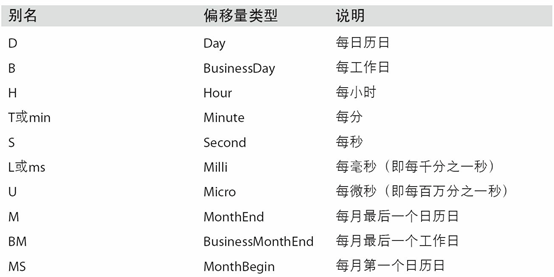

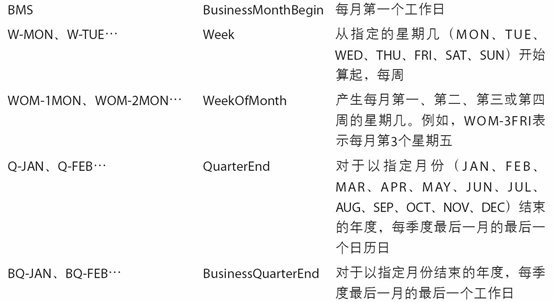

#### 默认保留起始和结束的时间戳

In [86]:
pd.date_range('2019/01/01', '2019/01/04')

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04'], dtype='datetime64[ns]', freq='D')

#### pd.date_range(, normalize=True)规范化

In [88]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=False)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [89]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 频率和日期的偏移量

pandas中的频率是由一个基础频率（base frequency）和一个乘数组成的。基础频率通常以一个字符串别名表示，比如"M"表示每月，"H"表示每小时。对于每个基础频率，都有一个被称为日期偏移量（date offset）的对象与之对应。例如，按小时计算的频率可以用Hour类表示：

In [90]:
from pandas.tseries.offsets import Hour, Minute

In [91]:
hour = Hour()
hour

<Hour>

传入一个整数即可定义偏移量的倍数：

In [92]:
four_hours = Hour(4)
four_hours

<4 * Hours>

#### 将偏移量传入到freq中

In [95]:
pd.date_range('2019/1/1', '2019/1/3', freq='4H')

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 04:00:00',
               '2019-01-01 08:00:00', '2019-01-01 12:00:00',
               '2019-01-01 16:00:00', '2019-01-01 20:00:00',
               '2019-01-02 00:00:00', '2019-01-02 04:00:00',
               '2019-01-02 08:00:00', '2019-01-02 12:00:00',
               '2019-01-02 16:00:00', '2019-01-02 20:00:00',
               '2019-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

大部分偏移量对象都可通过加法进行连接：

In [96]:
Hour(2) + Minute(30)

<150 * Minutes>

In [99]:
pd.date_range('2019/1/1', '2019/1/3', freq='4h30min')

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 04:30:00',
               '2019-01-01 09:00:00', '2019-01-01 13:30:00',
               '2019-01-01 18:00:00', '2019-01-01 22:30:00',
               '2019-01-02 03:00:00', '2019-01-02 07:30:00',
               '2019-01-02 12:00:00', '2019-01-02 16:30:00',
               '2019-01-02 21:00:00'],
              dtype='datetime64[ns]', freq='270T')

#### pandas 中的频率代码和日期偏移量

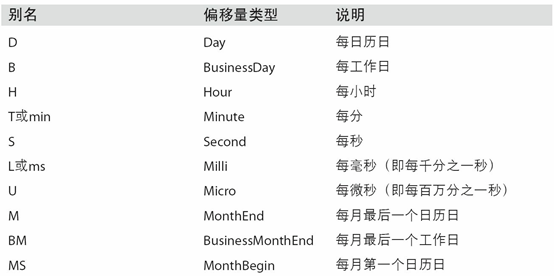

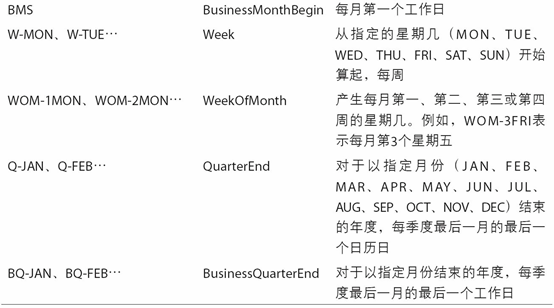

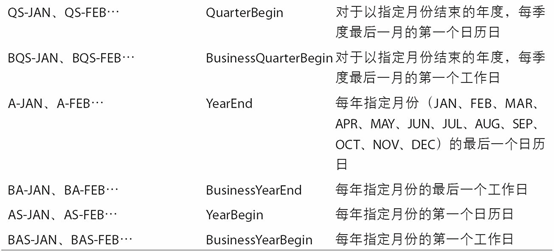

### WOM(Week Of Month)日期

获取每月第3个周日

In [3]:
rng = pd.date_range('2019/1/1', '2019-10-1', freq='WOM-3Sun')
list(rng)

[Timestamp('2019-01-20 00:00:00', freq='WOM-3SUN'),
 Timestamp('2019-02-17 00:00:00', freq='WOM-3SUN'),
 Timestamp('2019-03-17 00:00:00', freq='WOM-3SUN'),
 Timestamp('2019-04-21 00:00:00', freq='WOM-3SUN'),
 Timestamp('2019-05-19 00:00:00', freq='WOM-3SUN'),
 Timestamp('2019-06-16 00:00:00', freq='WOM-3SUN'),
 Timestamp('2019-07-21 00:00:00', freq='WOM-3SUN'),
 Timestamp('2019-08-18 00:00:00', freq='WOM-3SUN'),
 Timestamp('2019-09-15 00:00:00', freq='WOM-3SUN')]

### 移动(超前、滞后)数据

Series和DataFrame都有一个`shift`方法用于执行单纯的前移或后移操作，保持索引不变：

In [5]:
ts = pd.Series(np.random.randn(4),
                   index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -1.139266
2000-02-29    0.385917
2000-03-31    0.037736
2000-04-30    0.924356
Freq: M, dtype: float64

In [7]:
# 向前移动一个数据
ts.shift(1)

2000-01-31         NaN
2000-02-29   -1.139266
2000-03-31    0.385917
2000-04-30    0.037736
Freq: M, dtype: float64

In [9]:
# 往后推进一个数据
ts.shift(-1)

2000-01-31    0.385917
2000-02-29    0.037736
2000-03-31    0.924356
2000-04-30         NaN
Freq: M, dtype: float64

shift通常用于计算一个时间序列或多个时间序列（如DataFrame的列）中的百分比变化。可以这样表达：

In [14]:
ts / ts.shift(-1) - 1

2000-01-31   -3.952099
2000-02-29    9.226700
2000-03-31   -0.959176
2000-04-30         NaN
Freq: M, dtype: float64

如果知道频率的化，可以对时间戳进行偏移

In [16]:
ts.shift(2, freq='M')

2000-03-31   -1.139266
2000-04-30    0.385917
2000-05-31    0.037736
2000-06-30    0.924356
Freq: M, dtype: float64

In [18]:
ts.shift(2,freq='D')

2000-02-02   -1.139266
2000-03-02    0.385917
2000-04-02    0.037736
2000-05-02    0.924356
dtype: float64

In [19]:
ts.shift(1, freq='1h30min')

2000-01-31 01:30:00   -1.139266
2000-02-29 01:30:00    0.385917
2000-03-31 01:30:00    0.037736
2000-04-30 01:30:00    0.924356
Freq: M, dtype: float64

### 通过偏移量对日期进行移位

pandas的日期偏移量还可以用在datetime或Timestamp对象上：

In [21]:
from pandas.tseries.offsets import Day, MonthEnd

In [25]:
now = datetime(2019, 1, 1)
now

datetime.datetime(2019, 1, 1, 0, 0)

In [27]:
day = Day(2)
day

<2 * Days>

In [29]:
now + day

Timestamp('2019-01-03 00:00:00')

In [31]:
# 当前时间增加到原日期的月末
now + MonthEnd(1)

Timestamp('2019-01-31 00:00:00')

In [33]:
now + MonthEnd(-1)

Timestamp('2018-12-31 00:00:00')

通过锚点偏移量的rollforward和rollback方法，可明确地将日期向前或向后“滚动”：

In [35]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2019-01-31 00:00:00')

In [38]:
offset.rollback(now)

Timestamp('2018-12-31 00:00:00')

In [42]:
ts = pd.Series(np.random.randn(20),
                index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    1.170257
2000-01-19   -1.935762
2000-01-23    0.141192
2000-01-27    1.813741
2000-01-31   -0.686230
2000-02-04   -0.407397
2000-02-08   -0.890888
2000-02-12   -1.185390
2000-02-16   -0.606697
2000-02-20   -0.902641
2000-02-24   -2.125736
2000-02-28    1.952374
2000-03-03   -1.236281
2000-03-07   -0.627760
2000-03-11    0.256645
2000-03-15   -0.335927
2000-03-19   -1.294444
2000-03-23    0.560735
2000-03-27   -1.158295
2000-03-31   -0.829202
Freq: 4D, dtype: float64

结合groupby对时间偏移后的数据进行分组

In [44]:
ts.groupby(offset.rollback).count()

1999-12-31    4
2000-01-31    8
2000-02-29    7
2000-03-31    1
dtype: int64

In [50]:
# 下面代码等价于 ts.groupby(MonthEnd().rollforward).mean()
ts.resample('M').mean()  

2000-01-31    0.100640
2000-02-29   -0.595197
2000-03-31   -0.583066
Freq: M, dtype: float64

## 时区处理

时间序列处理工作中最让人不爽的就是对时区的处理。许多人都选择以协调世界时（UTC，它是格林尼治标准时间（Greenwich Mean Time）的接替者，目前已经是国际标准了）来处理时间序列。时区是以UTC偏移量的形式表示的。例如，夏令时期间，纽约比UTC慢4小时，而在全年其他时间则比UTC慢5小时。

在Python中，时区信息来自第三方库pytz，它使Python可以使用Olson数据库（汇编了世界时区信息）。这对历史数据非常重要，这是因为由于各地政府的各种突发奇想，夏令时转变日期（甚至UTC偏移量）已经发生过多次改变了。就拿美国来说，DST转变时间自1900年以来就改变过多次！

In [93]:
import pytz
pytz.common_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Tripoli',
 'Africa/Tunis',
 'Africa/Wi

In [95]:
tz = pytz.timezone('Asia/Shanghai')
tz

<DstTzInfo 'Asia/Shanghai' LMT+8:06:00 STD>

### 时区本地化和转换

In [96]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -1.113922
2012-03-10 09:30:00    0.563275
2012-03-11 09:30:00   -1.456323
2012-03-12 09:30:00   -0.053235
2012-03-13 09:30:00    0.336707
2012-03-14 09:30:00   -0.998902
Freq: D, dtype: float64

由于没有传入时区，默认索引中不包括时区

In [97]:
print(ts.index.tz)

None


生成包含时区的时间序列

In [98]:
pd.date_range('3/9/2011', periods=10, freq='M', tz='UTC')

DatetimeIndex(['2011-03-31 00:00:00+00:00', '2011-04-30 00:00:00+00:00',
               '2011-05-31 00:00:00+00:00', '2011-06-30 00:00:00+00:00',
               '2011-07-31 00:00:00+00:00', '2011-08-31 00:00:00+00:00',
               '2011-09-30 00:00:00+00:00', '2011-10-31 00:00:00+00:00',
               '2011-11-30 00:00:00+00:00', '2011-12-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='M')

时区本地化

In [99]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -1.113922
2012-03-10 09:30:00+00:00    0.563275
2012-03-11 09:30:00+00:00   -1.456323
2012-03-12 09:30:00+00:00   -0.053235
2012-03-13 09:30:00+00:00    0.336707
2012-03-14 09:30:00+00:00   -0.998902
Freq: D, dtype: float64

In [100]:
list(ts_utc.index)

[Timestamp('2012-03-09 09:30:00+0000', tz='UTC', freq='D'),
 Timestamp('2012-03-10 09:30:00+0000', tz='UTC', freq='D'),
 Timestamp('2012-03-11 09:30:00+0000', tz='UTC', freq='D'),
 Timestamp('2012-03-12 09:30:00+0000', tz='UTC', freq='D'),
 Timestamp('2012-03-13 09:30:00+0000', tz='UTC', freq='D'),
 Timestamp('2012-03-14 09:30:00+0000', tz='UTC', freq='D')]

一旦时间序列被本地化到某个特定时区，就可以用tz_convert将其转换到别的时区了：

In [101]:
ts_utc.tz_convert('Asia/Shanghai')

2012-03-09 17:30:00+08:00   -1.113922
2012-03-10 17:30:00+08:00    0.563275
2012-03-11 17:30:00+08:00   -1.456323
2012-03-12 17:30:00+08:00   -0.053235
2012-03-13 17:30:00+08:00    0.336707
2012-03-14 17:30:00+08:00   -0.998902
Freq: D, dtype: float64

### 操作时区意识型Timestamp对象

跟时间序列和日期范围差不多，独立的Timestamp对象也能被从单纯型（naive）本地化为时区意识型（time zone-aware），并从一个时区转换到另一个时区：

In [102]:
stamp = pd.Timestamp('2019/1/1')
stamp

Timestamp('2019-01-01 00:00:00')

In [103]:
stamp_utc = stamp.tz_localize('UTC')
stamp_utc

Timestamp('2019-01-01 00:00:00+0000', tz='UTC')

In [104]:
stamp_utc.tz_convert('Asia/Shanghai')

Timestamp('2019-01-01 08:00:00+0800', tz='Asia/Shanghai')

在创建Timestamp时，还可以传入一个时区信息：

In [105]:
pd.Timestamp('2019/1/1', tz='Asia/Shanghai')

Timestamp('2019-01-01 00:00:00+0800', tz='Asia/Shanghai')

时区意识型Timestamp对象在内部保存了一个UTC时间戳值（自UNIX纪元（1970年1月1日）算起的纳秒数）。这个UTC值在时区转换过程中是不会发生变化的：

In [106]:
stamp_utc.value

1546300800000000000

In [111]:
stamp_utc.tz_convert('Asia/Shanghai').value

1546300800000000000

### 不同时区之间的运算

如果两个时间序列的时区不同，在将它们合并到一起时，最终结果就会是UTC。由于时间戳其实是以UTC存储的，所以这是一个很简单的运算，并不需要发生任何转换：

In [133]:
rng = pd.date_range('1/1/2019', periods=10, freq='B', tz='UTC')
rng

DatetimeIndex(['2019-01-01 00:00:00+00:00', '2019-01-02 00:00:00+00:00',
               '2019-01-03 00:00:00+00:00', '2019-01-04 00:00:00+00:00',
               '2019-01-07 00:00:00+00:00', '2019-01-08 00:00:00+00:00',
               '2019-01-09 00:00:00+00:00', '2019-01-10 00:00:00+00:00',
               '2019-01-11 00:00:00+00:00', '2019-01-14 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [138]:
ts = pd.Series((np.random.randn(len(rng))), index=rng)
ts

2019-01-01 00:00:00+00:00    0.166555
2019-01-02 00:00:00+00:00    1.521781
2019-01-03 00:00:00+00:00    1.352429
2019-01-04 00:00:00+00:00    1.110394
2019-01-07 00:00:00+00:00   -0.051232
2019-01-08 00:00:00+00:00   -1.065529
2019-01-09 00:00:00+00:00    0.764355
2019-01-10 00:00:00+00:00    1.212409
2019-01-11 00:00:00+00:00    0.879274
2019-01-14 00:00:00+00:00    0.638782
Freq: B, dtype: float64

In [145]:
ts1 = ts[:7].tz_convert('Asia/Shanghai')
ts2 = ts1[:].tz_convert('Europe/Moscow')
ts1 + ts2  # 该操作会把ts1和ts2在原地转换为utc时区，再相加

2019-01-01 00:00:00+00:00    0.333110
2019-01-02 00:00:00+00:00    3.043561
2019-01-03 00:00:00+00:00    2.704859
2019-01-04 00:00:00+00:00    2.220788
2019-01-07 00:00:00+00:00   -0.102463
2019-01-08 00:00:00+00:00   -2.131057
2019-01-09 00:00:00+00:00    1.528709
Freq: B, dtype: float64

In [146]:
ts1

2019-01-01 00:00:00+00:00    0.166555
2019-01-02 00:00:00+00:00    1.521781
2019-01-03 00:00:00+00:00    1.352429
2019-01-04 00:00:00+00:00    1.110394
2019-01-07 00:00:00+00:00   -0.051232
2019-01-08 00:00:00+00:00   -1.065529
2019-01-09 00:00:00+00:00    0.764355
Freq: B, dtype: float64

## 时期及其算数运算

时期（period）表示的是时间区间，比如数日、数月、数季、数年等。Period类所表示的就是这种数据类型，其构造函数需要用到一个字符串或整数。

In [149]:
p = pd.Period(2019, freq='A-DEC')
p  # 表示，从2019年1月1日到2019年12月31日之间的整段时间

Period('2019', 'A-DEC')

In [151]:
p + 5

Period('2024', 'A-DEC')

In [156]:
pd.Period(2014, freq='A-DEC') - p

<-5 * YearEnds: month=12>

period_range函数可用于创建规则的时期范围：

In [160]:
rng = pd.period_range('2019-1-1',periods=10, freq='D')
rng

PeriodIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
             '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
             '2019-01-09', '2019-01-10'],
            dtype='period[D]', freq='D')

PeriodIndex类保存了一组Period，它可以在任何pandas数据结构中被用作轴索引：

In [168]:
pd.Series(np.random.randn(10), index=rng).index

PeriodIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
             '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
             '2019-01-09', '2019-01-10'],
            dtype='period[D]', freq='D')

In [169]:
rng2 = pd.date_range('2019-1-1', periods=10, freq='D')
pd.Series(np.random.randn(10), index=rng2).index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10'],
              dtype='datetime64[ns]', freq='D')

如果你有一个字符串数组，你也可以使用PeriodIndex类：

In [171]:
values =  ['2000Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2000Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 时期的频率转换

Period和PeriodIndex对象都可以通过其asfreq方法被转换成别的频率。假设我们有一个年度时期，希望将其转换为当年年初或年末的一个月度时期。该任务非常简单：

In [172]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [178]:
p.asfreq('D')

Period('2007-12-31', 'D')

In [179]:
p.asfreq('D', how='start')

Period('2007-01-01', 'D')

In [180]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

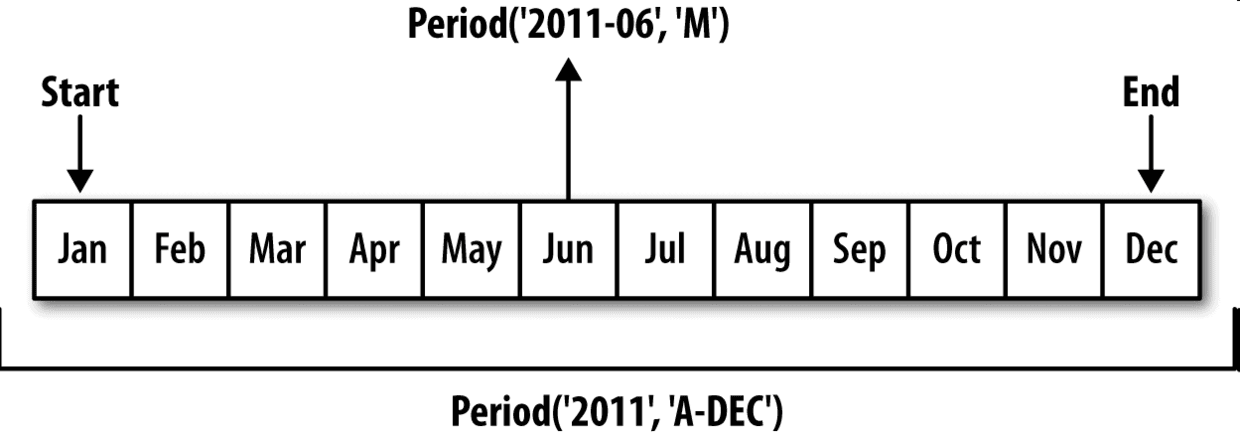

在将高频率转换为低频率时，超时期（superperiod）是由子时期（subperiod）所属的位置决定的。例如，在A-JUN频率中，月份“2007年8月”实际上是属于周期“2008年”的：

In [184]:
p = pd.Period('Aug-2019', freq='M')
p.asfreq('A-JUN')

Period('2020', 'A-JUN')

### 按季度计算的时期频率

### 将Timestamp转换为Period（及其反向过程）

通过使用to_period方法，可以将由时间戳索引的Series和DataFrame对象转换为以时期索引：

In [185]:
rng = pd.date_range('2019/1/1', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)
ts

2019-01-31    0.466274
2019-02-28    0.710666
2019-03-31    0.304306
Freq: M, dtype: float64

In [187]:
ts.to_period()

2019-01    0.466274
2019-02    0.710666
2019-03    0.304306
Freq: M, dtype: float64

由于时期指的是非重叠时间区间，因此对于给定的频率，一个时间戳只能属于一个时期。新PeriodIndex的频率默认是从时间戳推断而来的，你也可以指定任何别的频率。结果中允许存在重复时期

In [189]:
ts.to_period('Y')

2019    0.466274
2019    0.710666
2019    0.304306
Freq: A-DEC, dtype: float64

要转换回时间戳，使用to_timestamp即可：

In [192]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2

2000-01-29   -0.151715
2000-01-30   -0.746358
2000-01-31    0.173479
2000-02-01   -0.340823
2000-02-02   -0.214179
2000-02-03   -1.945387
Freq: D, dtype: float64

In [193]:
ts2.to_period('M')

2000-01   -0.151715
2000-01   -0.746358
2000-01    0.173479
2000-02   -0.340823
2000-02   -0.214179
2000-02   -1.945387
Freq: M, dtype: float64

In [206]:
pts = ts2.to_period ()
pts

2000-01-29   -0.151715
2000-01-30   -0.746358
2000-01-31    0.173479
2000-02-01   -0.340823
2000-02-02   -0.214179
2000-02-03   -1.945387
Freq: D, dtype: float64

In [209]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.151715
2000-01-30 23:59:59.999999999   -0.746358
2000-01-31 23:59:59.999999999    0.173479
2000-02-01 23:59:59.999999999   -0.340823
2000-02-02 23:59:59.999999999   -0.214179
2000-02-03 23:59:59.999999999   -1.945387
Freq: D, dtype: float64

### 通过数组创建PeriodIndex

固定频率的数据集通常会将时间信息分开存放在多个列中。例如，在下面这个宏观经济数据集中，年度和季度就分别存放在不同的列中：

In [211]:
data = pd.read_csv('examples/macrodata.csv')
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [213]:
data.year.tail()

198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, dtype: float64

In [214]:
data.quarter.tail()

198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, dtype: float64

通过将这些数组以及一个频率传入PeriodIndex，就可以将它们合并成DataFrame的一个索引：

In [216]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter,
                      freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [217]:
data.index=index

In [224]:
data

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
1960Q2,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.550,140.2,2.68,5.2,180.671,0.14,2.55
1960Q3,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.750,140.9,2.36,5.6,181.528,2.70,-0.34
1960Q4,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.840,141.1,2.29,6.3,182.287,1.21,1.08
1961Q1,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.810,142.1,2.37,6.8,182.992,-0.40,2.77
1961Q2,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.920,142.9,2.29,7.0,183.691,1.47,0.81


## 重采样及频率转换

重采样（resampling）指的是将时间序列从一个频率转换到另一个频率的处理过程。将高频率数据聚合到低频率称为降采样（downsampling），而将低频率数据转换到高频率则称为升采样（upsampling）。并不是所有的重采样都能被划分到这两个大类中。例如，将W-WED（每周三）转换为W-FRI既不是降采样也不是升采样。

pandas对象都带有一个resample方法，它是各种频率转换工作的主力函数。resample有一个类似于groupby的API，调用resample可以分组数据，然后会调用一个聚合函数：

In [225]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts.head()

2000-01-01    0.372427
2000-01-02   -0.790053
2000-01-03   -1.559151
2000-01-04   -0.465269
2000-01-05    1.796247
Freq: D, dtype: float64

In [229]:
ts.resample('M').mean()

2000-01-31   -0.076796
2000-02-29    0.237675
2000-03-31   -0.095971
2000-04-30   -0.210254
Freq: M, dtype: float64

In [232]:
ts.resample('M', kind='period').mean()

2000-01   -0.076796
2000-02    0.237675
2000-03   -0.095971
2000-04   -0.210254
Freq: M, dtype: float64

resample方法的参数

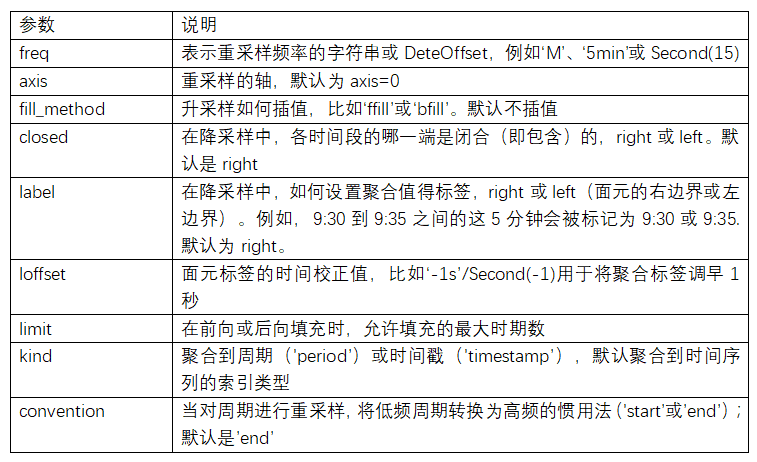

### 降采样

将数据聚合到规律的**低频率**是一件非常普通的时间序列处理任务。待聚合的数据不必拥有固定的频率，期望的频率会自动定义聚合的面元边界，这些面元用于将时间序列拆分为多个片段。例如，要转换到月度频率（'M'或'BM'），数据需要被划分到多个单月时间段中。各时间段都是半开放的。一个数据点只能属于一个时间段，所有时间段的并集必须能组成整个时间帧。在用resample对数据进行降采样时，需要考虑两样东西：

+    各区间哪边是闭合的。
+    如何标记各个聚合面元，用区间的开头还是末尾。


示例：

In [269]:
rng = pd.date_range('2019/1/1', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)
ts

2019-01-01 00:00:00     0
2019-01-01 00:01:00     1
2019-01-01 00:02:00     2
2019-01-01 00:03:00     3
2019-01-01 00:04:00     4
2019-01-01 00:05:00     5
2019-01-01 00:06:00     6
2019-01-01 00:07:00     7
2019-01-01 00:08:00     8
2019-01-01 00:09:00     9
2019-01-01 00:10:00    10
2019-01-01 00:11:00    11
Freq: T, dtype: int32

示例1：以5min为区间对样本采样。  
采样点以右区间为准

In [241]:
ts.resample('5min', closed='right').sum()

2018-12-31 23:55:00     0
2019-01-01 00:00:00    15
2019-01-01 00:05:00    40
2019-01-01 00:10:00    11
Freq: 5T, dtype: int32

示例2：以5min为区间对样本进行采样。  
采样点以左区间为准

In [250]:
ts.resample('5min', closed='left').sum()

2019-01-01 00:00:00    10
2019-01-01 00:05:00    35
2019-01-01 00:10:00    21
Freq: 5T, dtype: int32

示例3：以5min为区间对样本进行采样。
采样点以左区间为准。  
并设置index显示右端点

In [251]:
ts.resample('5min', closed='right', label='right').sum()

2019-01-01 00:00:00     0
2019-01-01 00:05:00    15
2019-01-01 00:10:00    40
2019-01-01 00:15:00    11
Freq: 5T, dtype: int32

示例4：以5min为区间对样本进行采样。
采样点以左区间为准。  
并设置index显示左端点

In [253]:
ts.resample('5min', closed='right', label='left').sum()

2018-12-31 23:55:00     0
2019-01-01 00:00:00    15
2019-01-01 00:05:00    40
2019-01-01 00:10:00    11
Freq: 5T, dtype: int32

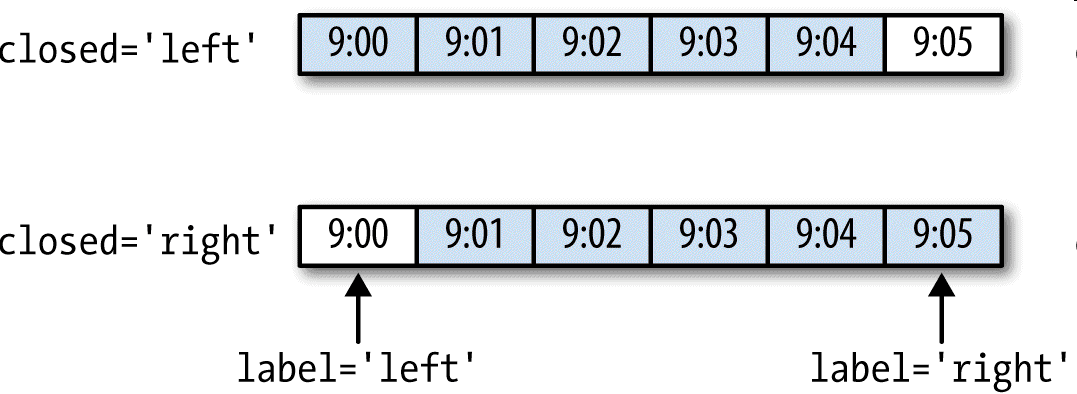

最后，你可能希望对结果索引做一些位移，比如从右边界减去一秒以便更容易明白该时间戳到底表示的是哪个区间。只需通过loffset设置一个字符串或日期偏移量即可实现这个目的：

示例5：以5min为采样单位对ts重采样，区间右端闭合，显示右区间-1s

In [255]:
ts.resample('5min', closed='right', label='right',
            loffset='-1s').sum()

2018-12-31 23:59:59     0
2019-01-01 00:04:59    15
2019-01-01 00:09:59    40
2019-01-01 00:14:59    11
Freq: 5T, dtype: int32

In [264]:
ts.resample('5min', closed='right', label='right').sum().shift(-1, freq='s')

2018-12-31 23:59:59     0
2019-01-01 00:04:59    15
2019-01-01 00:09:59    40
2019-01-01 00:14:59    11
Freq: 5T, dtype: int32

### ohlc重采样

In [272]:
ts.resample('5min').ohlc()

,open,high,low,close
2019-01-01 00:00:00,0,4,0,4
2019-01-01 00:05:00,5,9,5,9
2019-01-01 00:10:00,10,11,10,11


### 升采样和插值

在将数据从低频率转换到高频率时，就不需要聚合了。我们来看一个带有一些周型数据的DataFrame：

In [273]:
frame = pd.DataFrame(np.random.randn(2, 4),
                    index=pd.date_range('2019/1/1', periods=2,
                                       freq='W-WED'),
                    columns=['a', 'b','c','d'])
frame

,a,b,c,d
2019-01-02,-0.528035,-0.338209,0.223793,-0.139179
2019-01-09,0.442727,1.220472,-2.504973,-0.581260


当你对这个数据进行聚合，每组只有一个值，这样就会引入缺失值。我们使用asfreq方法转换成高频，不经过聚合：

In [277]:
df_daily = frame.resample('D').asfreq()
df_daily

,a,b,c,d
2019-01-02,-0.528035,-0.338209,0.223793,-0.139179
2019-01-03,NaN,NaN,NaN,NaN
2019-01-04,NaN,NaN,NaN,NaN
2019-01-05,NaN,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN
2019-01-09,0.442727,1.220472,-2.504973,-0.581260


假设你想要用前面的周型值填充“非星期三”。resampling的填充和插值方式跟fillna和reindex的一样：

In [279]:
frame.resample('D').ffill()

,a,b,c,d
2019-01-02,-0.528035,-0.338209,0.223793,-0.139179
2019-01-03,-0.528035,-0.338209,0.223793,-0.139179
2019-01-04,-0.528035,-0.338209,0.223793,-0.139179
2019-01-05,-0.528035,-0.338209,0.223793,-0.139179
2019-01-06,-0.528035,-0.338209,0.223793,-0.139179
2019-01-07,-0.528035,-0.338209,0.223793,-0.139179
2019-01-08,-0.528035,-0.338209,0.223793,-0.139179
2019-01-09,0.442727,1.220472,-2.504973,-0.581260


同样，这里也可以只填充指定的时期数（目的是限制前面的观测值的持续使用距离）：

In [280]:
frame.resample('D').ffill(limit=2)

,a,b,c,d
2019-01-02,-0.528035,-0.338209,0.223793,-0.139179
2019-01-03,-0.528035,-0.338209,0.223793,-0.139179
2019-01-04,-0.528035,-0.338209,0.223793,-0.139179
2019-01-05,NaN,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN,NaN
2019-01-07,NaN,NaN,NaN,NaN
2019-01-08,NaN,NaN,NaN,NaN
2019-01-09,0.442727,1.220472,-2.504973,-0.581260


In [284]:
frame.resample('W-THU').ffill()

,a,b,c,d
2019-01-03,-0.528035,-0.338209,0.223793,-0.139179
2019-01-10,0.442727,1.220472,-2.504973,-0.581260


### 通过时期进行重采样


In [285]:
frame = pd.DataFrame(np.random.randn(24, 4),
                         index=pd.period_range('1-2000', '12-2001',
                                               freq='M'),
                         columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.899066,-0.567201,1.188269,-0.621736
2000-02,-2.437898,0.697585,-1.638365,-0.407228
2000-03,0.024034,0.694268,-0.982188,1.307127
2000-04,0.236022,-1.065896,-0.538681,0.804936
2000-05,-0.534993,-0.049763,-0.321065,-1.210187


In [292]:
annual_frame = frame.resample('A-DEC').sum()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-1.375944,1.916479,0.045179,-1.244692
2001,0.186785,-0.456073,1.698920,0.790542


升采样要稍微麻烦一些，因为你必须决定在新频率中各区间的哪端用于放置原来的值，就像asfreq方法那样。convention参数默认为'start'，也可设置为'end'：

In [297]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').asfreq()

,Colorado,Texas,New York,Ohio
2000Q1,-1.375944,1.916479,0.045179,-1.244692
2000Q2,NaN,NaN,NaN,NaN
2000Q3,NaN,NaN,NaN,NaN
2000Q4,NaN,NaN,NaN,NaN
2001Q1,0.186785,-0.456073,1.698920,0.790542
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,NaN,NaN,NaN,NaN


In [298]:
annual_frame.resample('Q-DEC', convention='end').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,-1.375944,1.916479,0.045179,-1.244692
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.186785,-0.456073,1.698920,0.790542


In [300]:
annual_frame.resample('Q-MAR').asfreq()

,Colorado,Texas,New York,Ohio
2000Q4,-1.375944,1.916479,0.045179,-1.244692
2001Q1,NaN,NaN,NaN,NaN
2001Q2,NaN,NaN,NaN,NaN
2001Q3,NaN,NaN,NaN,NaN
2001Q4,0.186785,-0.456073,1.698920,0.790542
2002Q1,NaN,NaN,NaN,NaN
2002Q2,NaN,NaN,NaN,NaN
2002Q3,NaN,NaN,NaN,NaN
